In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [4]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [6]:
data


,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [8]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [9]:
y = data['GPA']
x1 = data[['SAT','Rand 1,2,3']]


In [11]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           6.58e-10
Time:                        20:28:54   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## With Dummy Variables


In [13]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [14]:
raw_data


,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [15]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [16]:
data_1 = raw_data.copy()

In [18]:
data_1['Attendance'] = data_1['Attendance'].map({'Yes':1,'No':0})

In [19]:
data_1

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


## Regression

In [20]:
y = data_1['GPA']
x1 = data_1[['SAT','Attendance']]

In [21]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           2.19e-15
Time:                        21:39:15   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

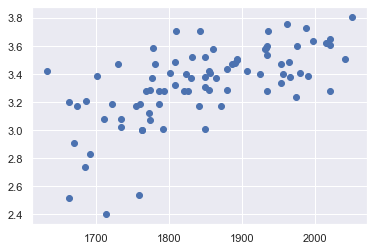

In [25]:
plt.scatter(data_1['SAT'],y)
yhat_no = 0.6439 + 0.0014*data_1['SAT']
yhat_yes = 0.8665 + 0.0014*data_1['SAT']


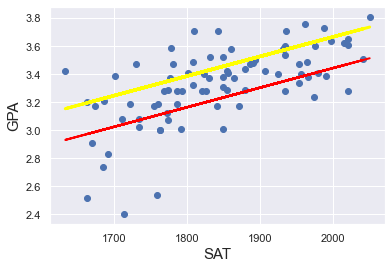

In [31]:
plt.scatter(data_1['SAT'],y)
yhat_no = 0.6439 + 0.0014*data_1['SAT']
yhat_yes = 0.8665 + 0.0014*data_1['SAT']


figure = plt.plot(data_1['SAT'],yhat_no, lw=2 , c = 'red')
figure = plt.plot(data_1['SAT'],yhat_yes, lw = 3 ,c = 'yellow')
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('GPA', fontsize = 15)
plt.show()

## make prediction

In [32]:
x


,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [34]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})

In [35]:
new_data = new_data[['const','SAT','Attendance']]

In [36]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [38]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [41]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
